In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
df=pd.read_csv("insurance.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.shape

(1338, 7)

In [6]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [8]:
df.corr()['expenses']

age         0.299008
bmi         0.198576
children    0.067998
expenses    1.000000
Name: expenses, dtype: float64

In [9]:
df['expenses'].value_counts()

1639.56     2
16884.92    1
29330.98    1
2221.56     1
19798.05    1
           ..
7345.08     1
26109.33    1
28287.90    1
1149.40     1
29141.36    1
Name: expenses, Length: 1337, dtype: int64

<AxesSubplot:xlabel='bmi', ylabel='expenses'>

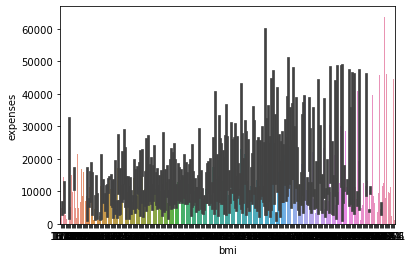

In [10]:
sns.barplot(data=df,x='bmi',y='expenses')

In [11]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

catogerical features

sex

smoker

region

# Data Analysis

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


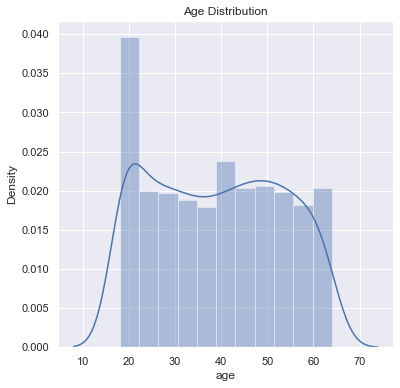

In [13]:
# the distribution of age value

sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['age'])
plt.title('Age Distribution')
plt.show()

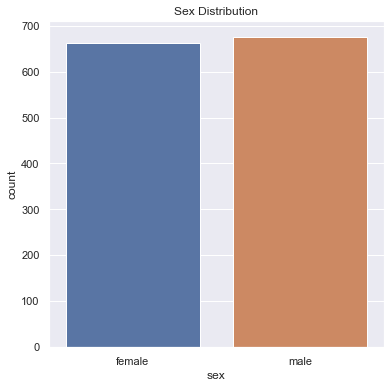

In [14]:
# gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=df)
plt.title('Sex Distribution')
plt.show()

In [15]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


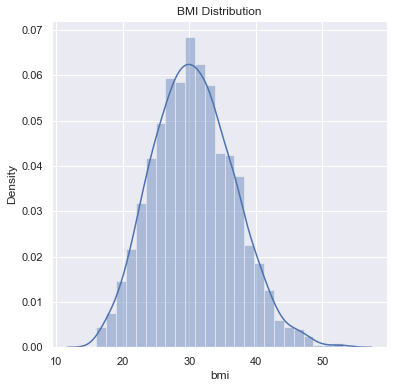

In [16]:
# BMI distribution

sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['bmi'])
plt.title('BMI Distribution')
plt.show()

Normal BMI Range--> 18.5 to 24.9

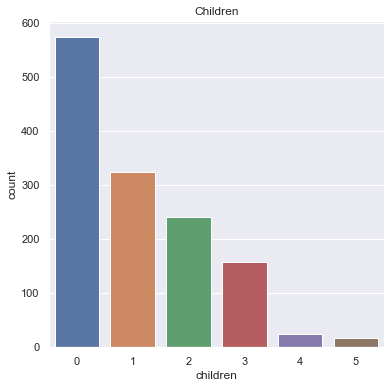

In [17]:
# Children Column

plt.figure(figsize=(6,6))
sns.countplot(x='children',data=df)
plt.title('Children')
plt.show()

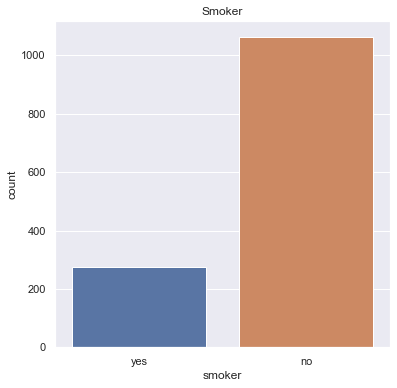

In [18]:
# Smoker
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=df)
plt.title('Smoker')
plt.show()


In [20]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

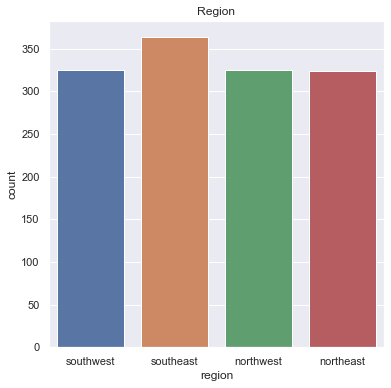

In [21]:
# Region
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=df)
plt.title('Region')
plt.show()



In [22]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


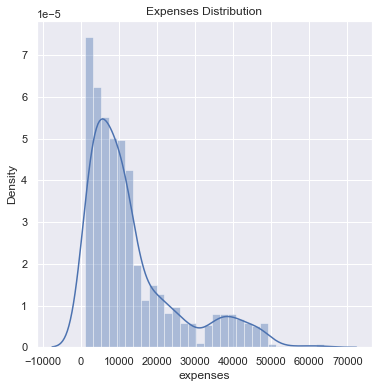

In [24]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['expenses'])
plt.title('Expenses Distribution')
plt.show()

# Data Preprocessing

In [27]:
# Encoding the catogerical Features
# Sex Columns

df.replace({'sex':{'male':0,"female":1}},inplace=True)

# smoker column
df.replace({'smoker':{'yes':0,'no':1}},inplace=True)

# Region column

df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

In [28]:
df

,age,sex,bmi,children,smoker,region,expenses
0,19,1,27.9,0,0,1,16884.92
1,18,0,33.8,1,1,0,1725.55
2,28,0,33.0,3,1,0,4449.46
3,33,0,22.7,0,1,3,21984.47
4,32,0,28.9,0,1,3,3866.86
...,...,...,...,...,...,...,...
1333,50,0,31.0,3,1,3,10600.55
1334,18,1,31.9,0,1,2,2205.98
1335,18,1,36.9,0,1,0,1629.83
1336,21,1,25.8,0,1,1,2007.95


# splitting the features and target

In [29]:
x=df.drop(columns='expenses',axis=1)
y=df['expenses']

In [30]:
x

,age,sex,bmi,children,smoker,region
0,19,1,27.9,0,0,1
1,18,0,33.8,1,1,0
2,28,0,33.0,3,1,0
3,33,0,22.7,0,1,3
4,32,0,28.9,0,1,3
...,...,...,...,...,...,...
1333,50,0,31.0,3,1,3
1334,18,1,31.9,0,1,2
1335,18,1,36.9,0,1,0
1336,21,1,25.8,0,1,1


In [31]:
y

0       16884.92
1        1725.55
2        4449.46
3       21984.47
4        3866.86
          ...   
1333    10600.55
1334     2205.98
1335     1629.83
1336     2007.95
1337    29141.36
Name: expenses, Length: 1338, dtype: float64

# training the model

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [35]:
regrissior=LinearRegression()

In [37]:
regrissior.fit(x_train,y_train)

LinearRegression()

# Model Evaluation

In [39]:
#prediction on teraining data

training_data_prediction=regrissior.predict(x_train)

In [40]:
# R squared value
r2_train=metrics.r2_score(y_train,training_data_prediction)

In [41]:
r2_train

0.7515233180624388

In [42]:
# prediction on testing data
test_data_prediction=regrissior.predict(x_test)

In [43]:
r2_test=metrics.r2_score(y_test,test_data_prediction)

In [44]:
r2_test

0.7447382074449773

# Building a Predictive System

In [46]:
input_data=(31,1,25.7,0,1,0)

# changing input data to a numpy array
input_data_as_numpy_array=np.asarray(input_data)

input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

prediction=regrissior.predict(input_data_reshaped)
print(prediction)

[3746.10714209]


C:\anaconda\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
